In [1]:
import keras
import os
import tensorboard as tb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import scipy.io as sio
from keras.utils import to_categorical
import scipy.misc as mi
import matplotlib.pyplot as plt

/home/neuronelab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import the necessary packages
import os

def list_images(basePath, contains=None):
    # return the set of files that are valid
    return list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"), contains=contains)

def list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"), contains=None):
    # loop over the directory structure
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # loop over the filenames in the current directory
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue

            # determine the file extension of the current file
            ext = filename[filename.rfind("."):].lower()

            # check to see if the file is an image and should be processed
            if ext.endswith(validExts):
                # construct the path to the image and yield it
                imagePath = os.path.join(rootDir, filename).replace(" ", "\\ ")
                yield imagePath

In [3]:
# Import necessary packages
import argparse

# Import necessary components to build LeNet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

def alexnet_model(img_shape=(64, 64, 3), n_classes=17, l2_reg=0.,weights=None):

    # Initialize model
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
        padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(512, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(3072))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

    if weights is not None:
        alexnet.load_weights(weights)

    return alexnet

def parse_args():
    parser = argparse.ArgumentParser(description='AlexNet model')
    optional = parser._action_groups.pop()
    required = parser.add_argument_group('required arguments')
    optional.add_argument('--print_model',
        dest='print_model',
        help='Print AlexNet model',
        action='store_true')
    parser._action_groups.append(optional)
    return parser.parse_args()

In [8]:
def createLuigiNet():
    model = Sequential()
    
    #Convolutional layers with 32 filters / kernels with a window size of 3×3
        
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128,128,3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
     #Max pooling layer with window size 2×2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    #Conv layer with 64 filters
        
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #Dense layer which performs the classification among 10 classes using a softmax layer
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
     
    return model

In [9]:
import random
import cv2

In [10]:
seed = 9
np.random.seed(seed)

In [11]:
import pickle
def savepickle(obj , filename):
    f = open(filename+'.pckl', 'wb')
    pickle.dump(obj, f)
    f.close()
def loadpickle(filename):
    f = open(filename+'.pckl', 'rb')
    obj = pickle.load(f)
    f.close()
    return obj

In [12]:
imageFolderPath = '/home/neuronelab/Desktop/MulticlassFolder/'
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(list_images(imageFolderPath)))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    if imagePath is not None:
    # load the image, pre-process it, and store it in the data list
        try:
            image = cv2.imread(imagePath)
            zimage = cv2.resize(image, (128, 128))
            image = img_to_array(zimage)
            data.append(image)
        # extract the class label from the image path and update the
        # labels list
            label = int(imagePath.split(os.path.sep)[-2][-2:])-1
            print(label)
        #Here we have to change the laveling to make it an integer instead of just 1 and sunglasses, also we have to use
        #sparse_categorical_crossentropy cuz is integers and not one-hot encoded
        
            #label = 1 if label == "Armani" elif 2
            labels.append(label)
        except:
            print("Image with error ", imagePath)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

[INFO] loading images...
0
1
0
1
3
0
3
0
1
1
2
0
0
2
3
0
1
3
0
3
0
3
0
3
3
3
3
1
1
1
2
3
0
3
2
0
3
3
3
1
0
2
1
3
2
1
0
3
3
1
0
1
1
1
2
0
3
3
3
1
1
3
2
2
1
1
1
1
3
3
1
0
3
1
0
2
0
3
1
3
3
0
0
0
0
3
0
2
3
3
2
3
0
3
0
1
2
2
1
2
1
0
3
0
0
0
3
1
2
3
2
3
0
0
2
2
0
2
2
0
3
1
3
0
0
3
1
0
3
1
2
3
3
0
1
2
0
3
2
1
0
0
0
2
3
1
1
0
3
0
0
0
2
2
0
2
3
2
0
3
0
3
2
1
0
3
3
0
3
3
1
1
3
2
2
2
1
2
2
3
3
0
3
2
3
2
1
3
0
3
3
3
2
3
3
1
3
0
1
0
0
3
0
2
1
3
3
1
3
0
2
3
0
1
1
3
0
0
2
0
0
0
0
2
0
1
0
1
2
1
0
3
1
0
3
3
0
0
2
3
3
3
0
0
2
3
3
3
2
1
3
0
0
2
1
2
3
2
1
2
1
3
2
0
3
1
3
3
1
0
1
2
3
1
2
0
3
3
2
0
2
0
2
3
1
2
2
0
0
3
3
1
3
0
3
3
0
1
0
0
0
0
0
2
3
3
3
0
0
3
1
0
1
0
3
2
0
0
0
0
3
3
3
2
2
1
2
3
3
3
0
1
3
2
1
3
2
1
1
3
0
1
1
0
2
1
2
0
2
1
0
1
0
0
3
3
1
0
1
2
1
2
3
2
0
1
2
3
3
1
3
0
3
0
3
2
1
0
2
0
3
1
0
2
3
0
2
3
3
3
0
1
3
3
0
0
3
2
2
0
1
2
3
1
2
0
3
3
2
1
3
3
1
3
3
0
0
3
1
0
0
3
3
1
3
3
3
2
3
0
2
0
0
1
3
2
3
3
0
1
2
2
2
3
1
2
3
2
0
1
1
3
2
0
3
3
3
1
2
1
2
2
3
0
1
0
3
1
0
1
3
3
3
2
2
1
3
0
1
3
2
2
2
3
1
3
1
3

In [13]:
labels=labels.astype(int)

In [14]:
labels.shape

(1442,)

In [15]:
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.20, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=4)
testY = to_categorical(testY, num_classes=4)
print(trainY.shape)

(1153, 4)


In [16]:
model=createLuigiNet()

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(trainX, trainY, validation_data=(testX, testY),shuffle=True, epochs=35, batch_size=32, verbose=1)

Train on 1153 samples, validate on 289 samples
Epoch 1/35
1153/1153 [==============================] - 50s 43ms/step - loss: 1.4659 - acc: 0.3200 - val_loss: 1.3852 - val_acc: 0.2837
Epoch 2/35
1153/1153 [==============================] - 49s 43ms/step - loss: 1.3732 - acc: 0.3365 - val_loss: 1.3954 - val_acc: 0.2837
Epoch 3/35
1153/1153 [==============================] - 49s 43ms/step - loss: 1.3682 - acc: 0.3365 - val_loss: 1.3846 - val_acc: 0.2837
Epoch 4/35
1153/1153 [==============================] - 49s 43ms/step - loss: 1.3720 - acc: 0.3365 - val_loss: 1.4005 - val_acc: 0.2837
Epoch 5/35
1153/1153 [==============================] - 49s 43ms/step - loss: 1.3697 - acc: 0.3365 - val_loss: 1.3935 - val_acc: 0.2837
Epoch 6/35
1153/1153 [==============================] - 49s 42ms/step - loss: 1.3643 - acc: 0.3452 - val_loss: 1.3861 - val_acc: 0.2837
Epoch 7/35
1153/1153 [==============================] - 49s 42ms/step - loss: 1.3641 - acc: 0.3365 - val_loss: 1.3850 - val_acc: 0.2837
E

In [19]:
hist = model.history

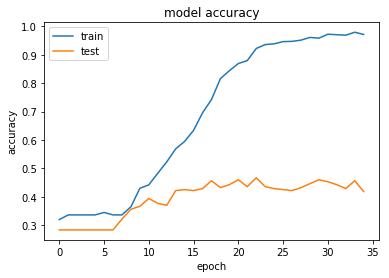

In [20]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

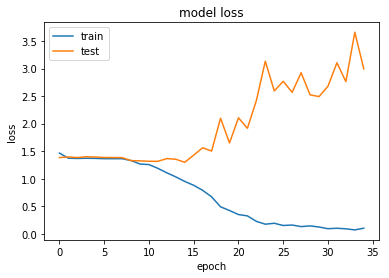

In [21]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# pre-process the image for classification
image = cv2.imread('test/r1.jpg')### CHANGE PATH
zimage = cv2.resize(image, (64, 64))
image = zimage.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
#IMAGE LEGEND R = RAYBAN  , S=SUNGLASSES , W = PEOPLE WITH SUNGLASSES , N = NO SUNGLASSES

In [24]:
def preprocessInpuutImage(pathToImage, width , height):
    image = cv2.imread(pathToImage)### CHANGE PATH
    zimage = cv2.resize(image, (width, height))
    image = zimage.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    return image 

In [28]:
pred = model.predict(preprocessInpuutImage('/home/neuronelab/Desktop/FraudDetection_v2/NN/test_images/g1.jpg' , 128 , 128))[0]
print(pred.max() , pred.argmax())
print(pred)

0.9869638 3
[8.2635293e-03 7.5607887e-04 4.0165866e-03 9.8696381e-01]


In [33]:
pred[3]

0.0006138989

In [29]:
model.save('withOutraybanmodel128x128_3010.model')

In [ ]:
(notSunglasses, sunglasses) = model.predict(preprocessInpuutImage('test/s1.jpg' , 64 , 64))[0]
# build the label
label = "Sunglasses" if sunglasses > notSunglasses else "Not Sunglasses"
proba = sunglasses if sunglasses > notSunglasses else notSunglasses
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(image)
first_layer_activation = activations[4]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
second = createModel()

In [ ]:
second.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
imageFolderPath = '/Users/michelecipriano/Desktop/images_2/'
# initialize the data and labels
print("[INFO] loading images...")
data2 = []
labels2 = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(imageFolderPath)))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    if imagePath is not None:
        print(imagePath)
# load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        zimage = cv2.resize(image, (128, 128))
        image = img_to_array(zimage)
        data2.append(image)
        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]
        print(label)
        label = 1 if label == "rayban" else 0
        labels2.append(label)

# scale the raw pixel intensities to the range [0, 1]
data2 = np.array(data2, dtype="float") / 255.0
labels2 = np.array(labels2)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data2,labels2, test_size=0.20, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)
print(trainX.shape)

In [ ]:
second.fit(trainX, trainY, validation_data=(testX, testY),shuffle=True, epochs=5, batch_size=32, verbose=1)

In [ ]:
# pre-process the image for classification
image = cv2.imread('test/r2.jpg')### CHANGE PATH
zimage = cv2.resize(image, (128, 128))
image = zimage.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
#IMAGE LEGEND R = RAYBAN  , S=SUNGLASSES , W = PEOPLE WITH SUNGLASSES , N = NO SUNGLASSES
(notSunglasses, sunglasses) = second.predict(image)[0]
# build the label
label = "RayBan" if sunglasses > notSunglasses else "Not Rayban"
proba = sunglasses if sunglasses > notSunglasses else notSunglasses
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

In [ ]:
#https://flyyufelix.github.io/2016/10/03/fine-tuning-in-keras-part1.html